# Machine Learning Pipeline - Data Analysis

In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline. 

We will discuss:

1. **Data Analysis**
2. Feature Engineering
3. Feature Selection
4. Model Training
5. Obtaining Predictions / Scoring


We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). See below for more details.

===================================================================================================

## Predicting Sale Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses.


# Data Analysis

Let's go ahead and load the dataset.

In [97]:
# to handle the dataset
import numpy as np
import pandas as pd

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for yeo-johnson transformation
from scipy.stats import yeojohnson

In [18]:
# load the dataset
df = pd.read_csv("../train.csv")

#print number of rows and columns
print(df.shape)
#few rows of dataset
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
# dropping the Id column, because its just a number given to identify each house
df.drop('Id', axis=1, inplace=True)

df.shape

(1460, 80)

In [20]:
print("The dataset contains 1460 houses with 80 variables , out of which 79 are predictive variables and 1 target variable i.e. SalePrice")

The dataset contains 1460 houses with 80 variables , out of which 79 are predictive variables and 1 target variable i.e. SalePrice


## Analysis

**We will analyse the following:**

1. The target variable
2. Variable types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations

5. Categorical variables
    - Cardinality
    - Rare Labels
    - Special mappings
    
6. Additional Reading Resources

## Target

Let's begin by exploring the target distribution.

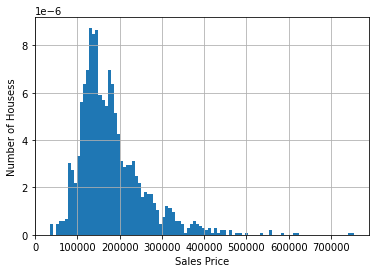

In [21]:
# histogram to evaluate the target distribution

df['SalePrice'].hist(bins = 100, density = True)
plt.xlabel("Sales Price")
plt.ylabel("Number of Housess")
plt.show()

we can see that target is continous and distribution is skewed towards right

We can improve the value spread with mathematical transformation

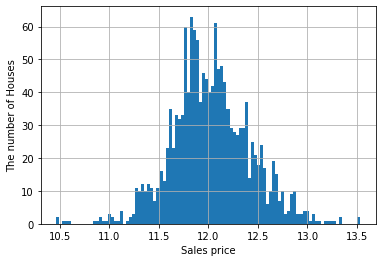

In [22]:
# lets transform the target variable using Logarithms
np.log(df['SalePrice']).hist(bins = 100, density = False)
plt.xlabel("Sales price")
plt.ylabel('The number of Houses')
plt.show()

Now the distribution looks more gaussian

## Variable Types

Next, let's identify the categorical and numerical variables

In [29]:
# lets identify the categorical variable
# we will capture those with type object

cat_var = [ var for var in df.columns if df[var].dtype =='O']

# MSSubClass is also categorical by definition, despite its numeric values

cat_var.append('MSSubClass')

# the number of categorical variables
len(cat_var)

44

In [30]:
# casting all variables as categorical
df[cat_var] = df[cat_var].astype('O')

In [33]:
# now identify the numerical variables
num_var = [ var for var in df.columns if var not in cat_var and var!='SalePrice']

#print the number of numerical variable
print(len(num_var))

35


# Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [35]:
# lets make a list of variable that contains the missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum()>0]

# determine the result as missing values and determine the result as % of missing values
df[vars_with_na].isnull().mean().sort_values(ascending = False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

Our dataset contains variables with big proportion of missing values and some other variables with small proportion of missing values
This means in order to train ML model with this dataset , we need to impute the missing values in the variables
We can also visualise the percentage of missing values as follows


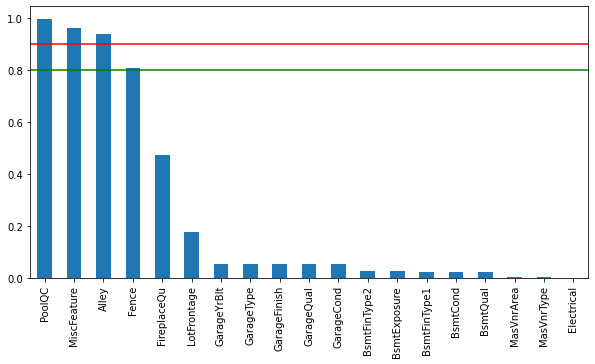

In [40]:
df[vars_with_na].isnull().mean().sort_values(ascending = False).plot.bar(figsize=(10,5))
plt.axhline(y = 0.9, color = 'red')
plt.axhline(y = 0.8, color = 'green')
plt.show()

In [41]:
# now we can determine which variables, from those missing data, 
# are categorical and which are numerical

cat_na = [var for var in cat_var if var in vars_with_na]
num_na = [var for var in num_var if var in vars_with_na]

print("The number of categorical variable with missing values", len(cat_na))
print("The number of numerical variables with missing values ", len(num_na))

The number of categorical variable with missing values 16
The number of numerical variables with missing values  3


In [42]:
num_na

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [43]:
cat_na

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

## Relationship between missing data and Sale Price

Let's evaluate the price of the house in those observations where the information is missing. We will do this for each variable that shows missing data.

In [51]:
def analyse_na_value(df, var):
    # making a deep copy of dataset so that we cannot make changes in it
    df = df.copy()
    
    # lets make a interim variable , 1 when observation is missing and 0
    # when observation is not missing
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    
    # determing the mean and standard deviation in the groups
    # 0 and 1 and then storing it in temp
    tmp = df.groupby(var)['SalePrice'].agg(['mean','std'])
    
    # plotting them in a bar graph
    
    tmp.plot(kind = 'barh',y = 'mean', legend = True, title = 'sales Price', color = 'green', xerr = 'std')
    

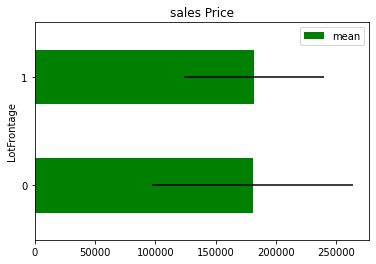

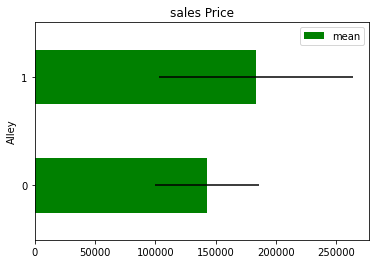

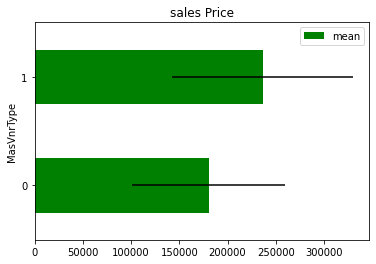

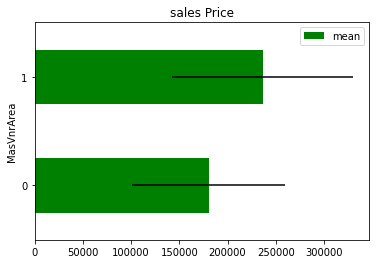

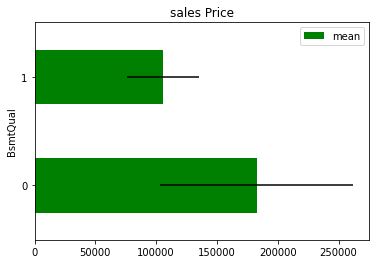

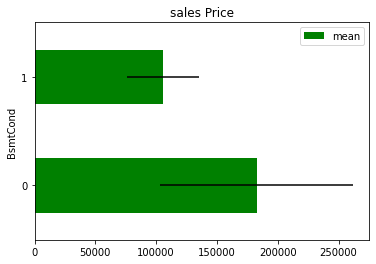

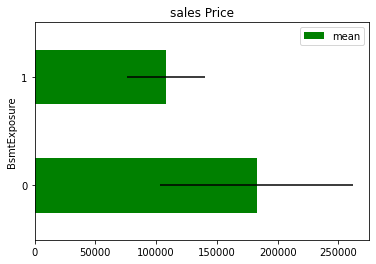

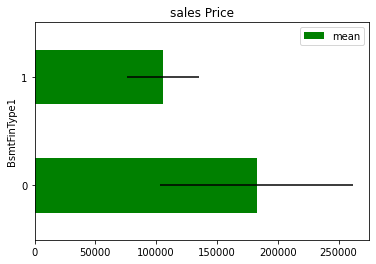

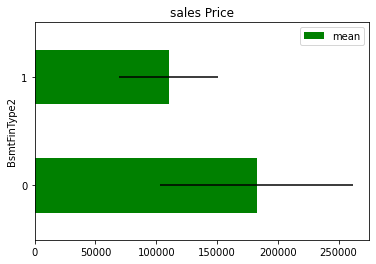

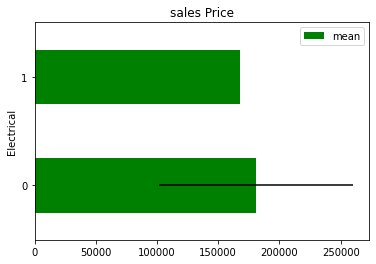

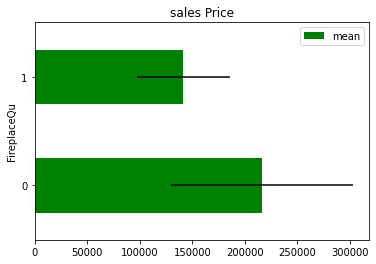

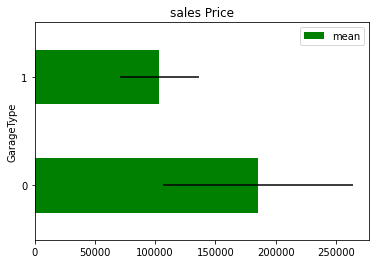

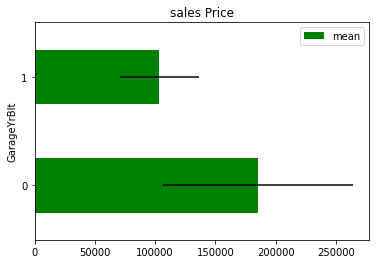

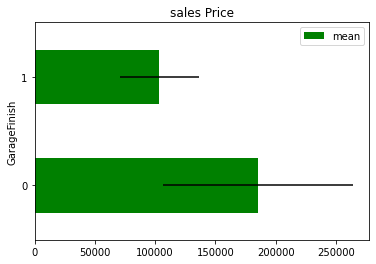

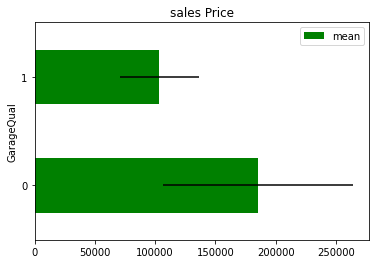

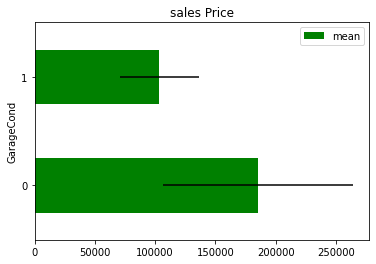

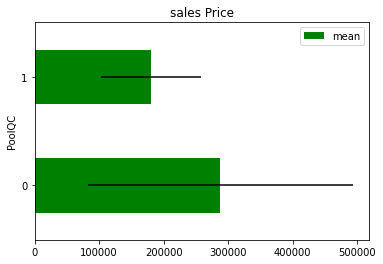

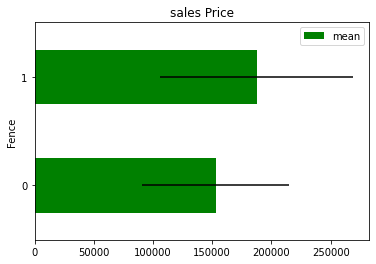

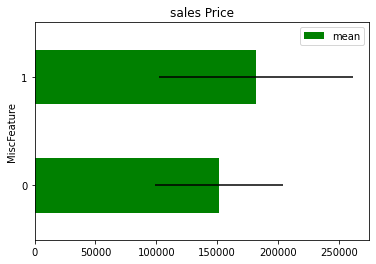

In [52]:
# lets run the funtion for each variable in the missing data
for var in vars_with_na:
    analyse_na_value(df, var)

In the above graphs, the mean of sales Price for missing variable is diffenent with the mean sales Price of obseravtions where data is not missing, this suggest that data being missing should be a good predictor of Sales Price

# Numerical variables

Let's go ahead and find out what numerical variables we have in the dataset

In [55]:
print("The number of numerical variables is " ,len(num_var))

df[num_var].head()

The number of numerical variables is  35


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,548,0,61,0,0,0,0,0,2,2008
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,460,298,0,0,0,0,0,0,5,2007
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,608,0,42,0,0,0,0,0,9,2008
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,642,0,35,272,0,0,0,0,2,2006
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,836,192,84,0,0,0,0,0,12,2008


## Temporal variables

We have 4 year variables in the dataset:

- YearBuilt: year in which the house was built
- YearRemodAdd: year in which the house was remodeled
- GarageYrBlt: year in which a garage was built
- YrSold: year in which the house was sold

We generally don't use date variables in their raw format. Instead, we extract information from them. For example, we can capture the difference in years between the year the house was built and the year the house was sold.

In [56]:
# list of variables that contain the year information
year_vars = [var for var in num_var if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [58]:
# lets explore the values of these temporal variables

for var in year_vars:
    print(var, df[var].unique())
    print()

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]

YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 200

as  expected the values are years
We can explore the the evolution of sales price in which the year house was sold

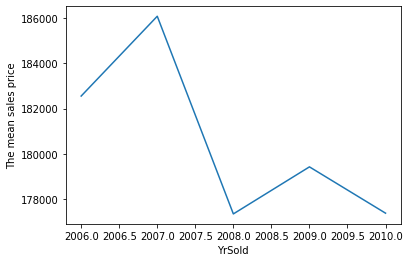

In [62]:
# plot the mean sales price vs year it was sold
df.groupby('YrSold')['SalePrice'].mean().plot()
plt.ylabel("The mean sales price")
plt.show()

Price first increases upto year 2007 and then decrease steeply and then increases

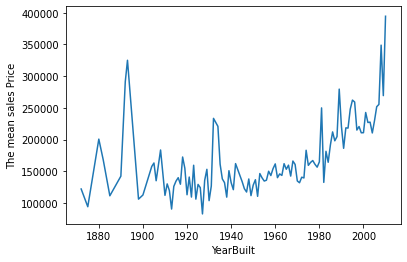

In [65]:
# plot the mean sales price vs year it was build
df.groupby('YearBuilt')['SalePrice'].mean().plot()
plt.ylabel('The mean sales Price')
plt.show()

This graph shows that there is high chance if the house is build recently there is high chance that its sales price is high

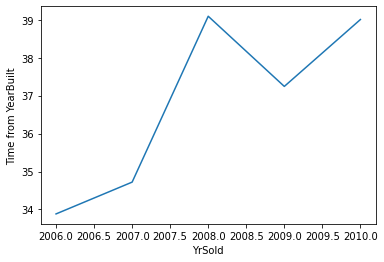

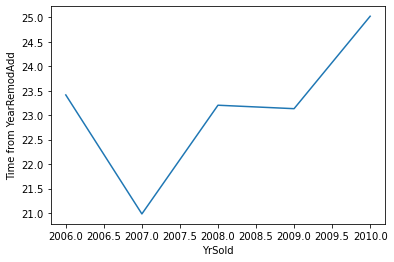

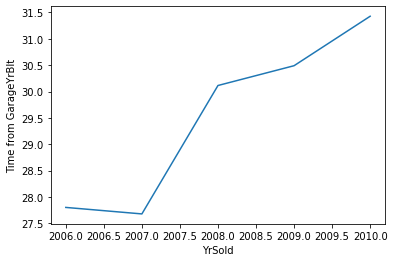

In [71]:
# we will now capture the time between the year variables and the year it was sold

def analyse_year_var(df, var):
    df = df.copy()
    df[var] = -df[var]+df['YrSold']
    df.groupby('YrSold')[var].mean().plot()
    plt.ylabel('Time from '+var)
    plt.show()
    
for var in year_vars:
    if var!='YrSold':
        analyse_year_var(df, var)

We will now see if there is there relationship between the year varialble and sales price

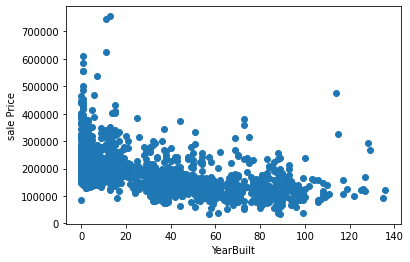

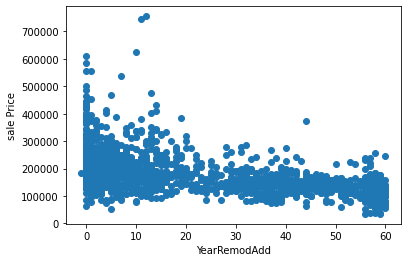

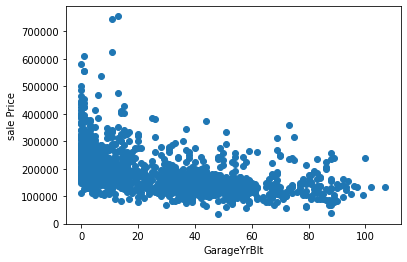

In [72]:
def analyse_year_vars(df, var):
    df = df.copy()
    df[var] = df['YrSold']-df[var]
    plt.scatter(df[var], df['SalePrice'])
    plt.ylabel("sale Price")
    plt.xlabel(var)
    plt.show()
for var in year_vars:
    if var!='YrSold':
        analyse_year_vars(df,var)

we see that there is a tendency to a decrease in price, with older houses. In other words, the longer the time between the house was built or remodeled and sale date, the lower the sale Price. 

Which makes sense, cause this means that the house will have an older look, and potentially needs repairs.

## Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [75]:
# lets make a list of descrete variables
dis_var = [var for var in num_var if var not in year_vars and len(df[var].unique())<20]

print("The number of descrete varibles is ", len(dis_var))

The number of descrete varibles is  13


In [76]:
# lets visualise the descrete variables
df[dis_var].head()

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,7,5,1,0,2,1,3,1,8,0,2,0,2
1,6,8,0,1,2,0,3,1,6,1,2,0,5
2,7,5,1,0,2,1,3,1,6,1,2,0,9
3,7,5,1,0,1,0,3,1,7,1,3,0,2
4,8,5,1,0,2,1,4,1,9,1,3,0,12


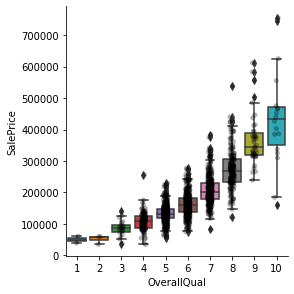

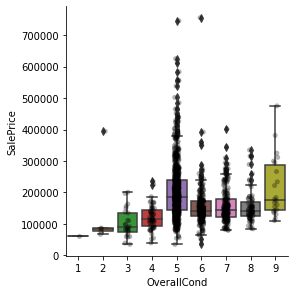

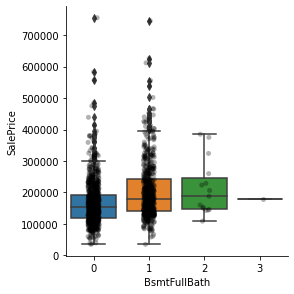

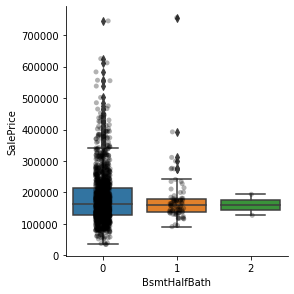

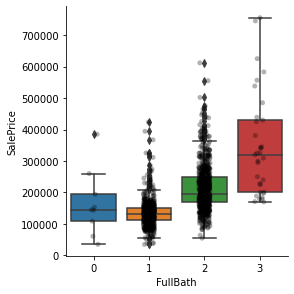

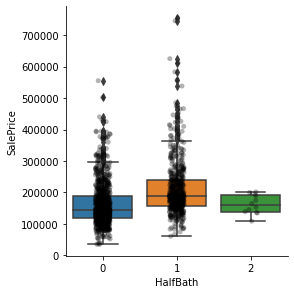

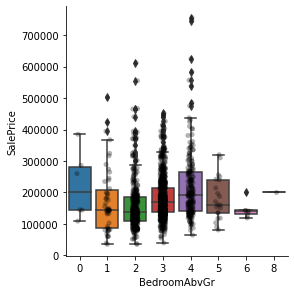

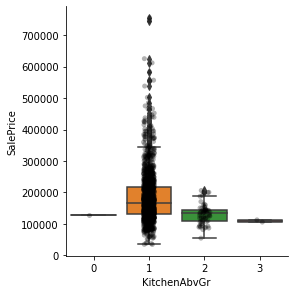

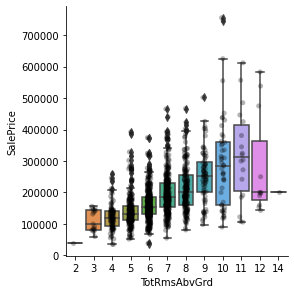

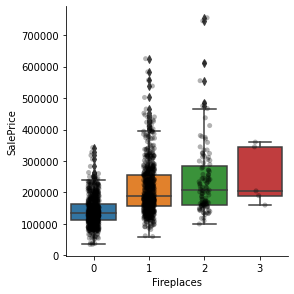

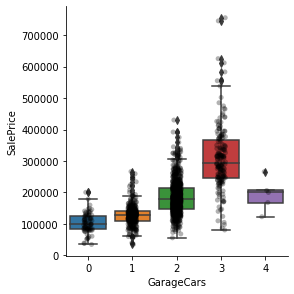

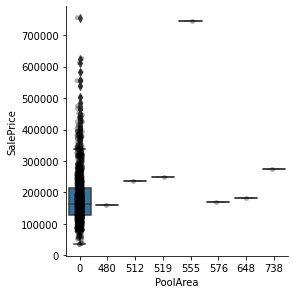

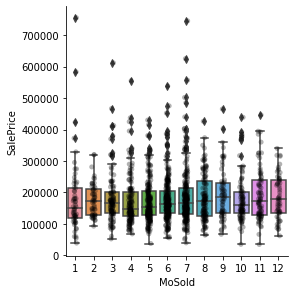

In [85]:
# lets go ahead and find the contribution of these descrete variable in the target variable
for var in dis_var:
    # make box plot with catplot
    sns.catplot(x = var, y ='SalePrice', data = df, kind = 'box', height = 4)
    # add data points with stripplot
    sns.stripplot(x=var, y='SalePrice', data = df, jitter = 0.1, color = 'k', alpha = 0.3)
    plt.show()

## Continuous variables

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete.

In [86]:
# lets make a list of continuos variable 
cont_var = [var for var in num_var if var not in year_vars+dis_var]

print("The number of continuous variable is ", len(cont_var))

The number of continuous variable is  18


In [87]:
# lets visualise the continuous variable
df[cont_var].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0


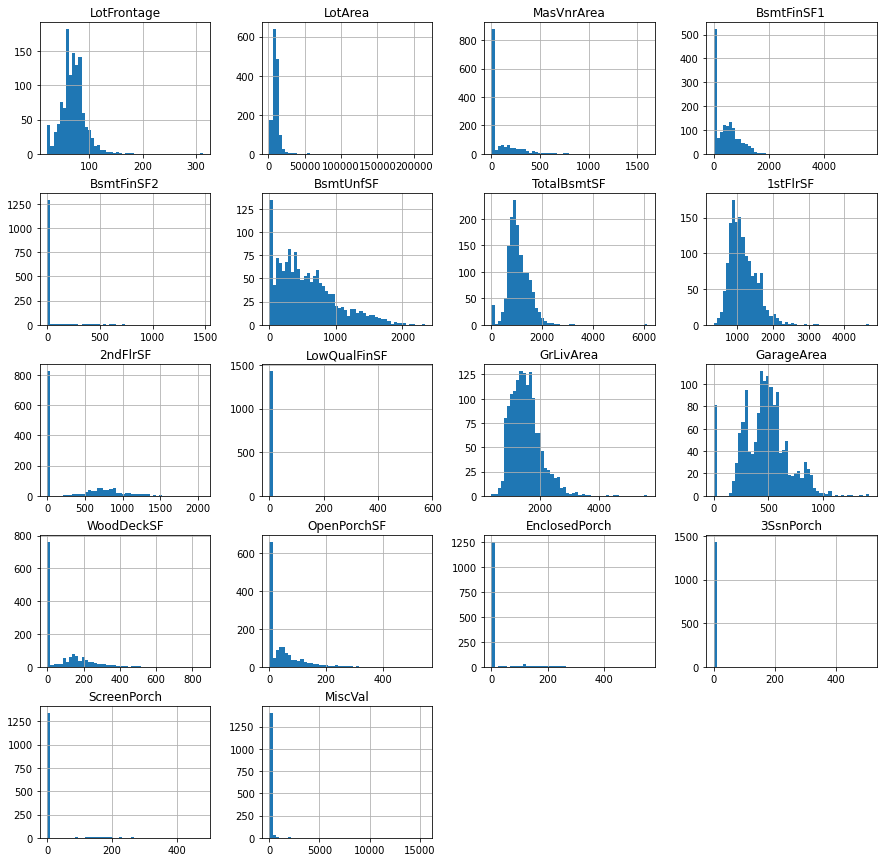

In [89]:
# lets plot the histogram for all continus variable
df[cont_var].hist(bins = 50, figsize=(15,15))
plt.show()

The variables are not normally distributed and  and there are particular few which are exteemly skewed

Sometimes tranforming the variable to improve the value spread, improve the model performance, but its unlikely that a tranformation will help change the distribution of super skewed variables dramatically

We can apply Yeo Johnson tranformation to variables like LotFrontage, LotArea and binary tranformation to variable like ScreenPorch, MiscVal

In [90]:
# making a list fo super skewed variable for future use
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [91]:
# capturing the remaing continuos variables
cont_var = [ var for var in cont_var if var not in skewed]

## Yeo Johnson Tranformation

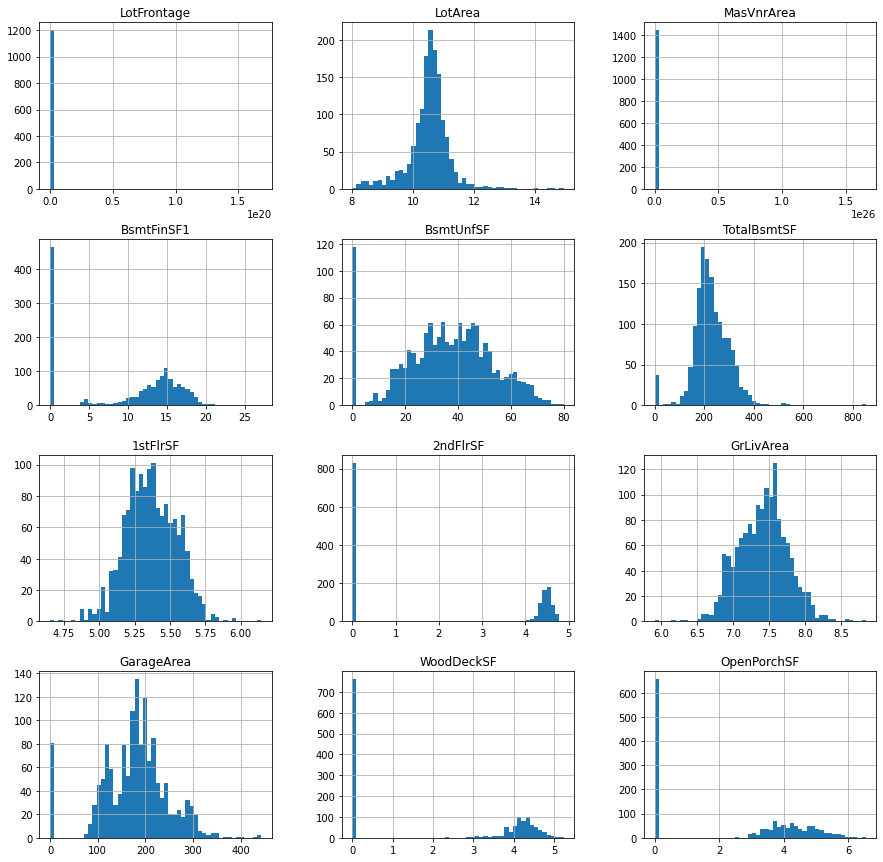

In [99]:
# lets go ahead and analyse the distribution of continuous variable after applying YeoJonhson tranformation

temp=df.copy()
for var in cont_var:
    temp[var] , param = yeojohnson(df[var])

# plot the histogram after the Yeo Johnson transformation
temp[cont_var].hist(bins=50, figsize=(15,15))
plt.show()

For LotFrontage and MasVnrArea the transformation did not do an amazing job. 

For the others, the values seem to be spread more evenly in the range.

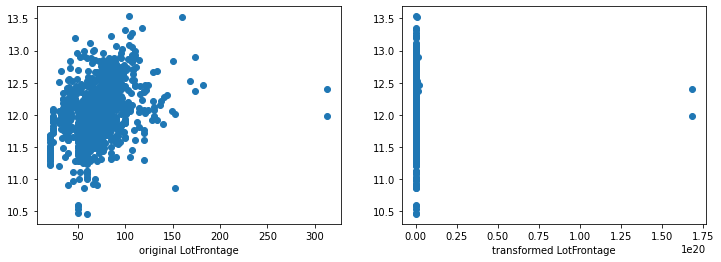

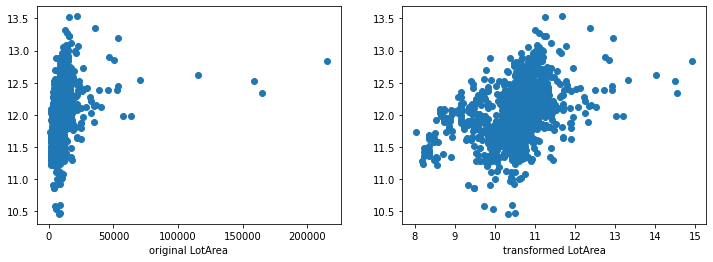

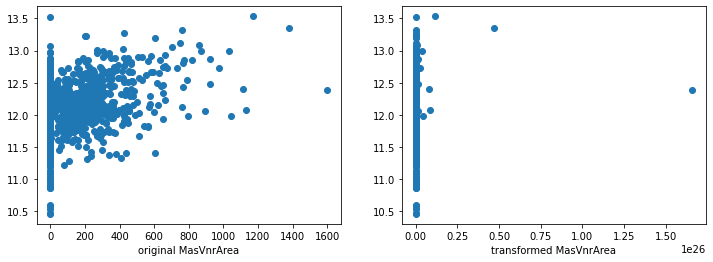

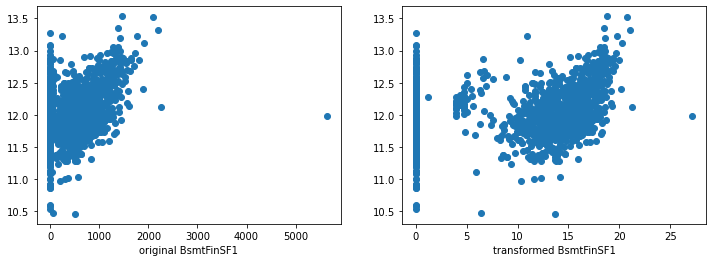

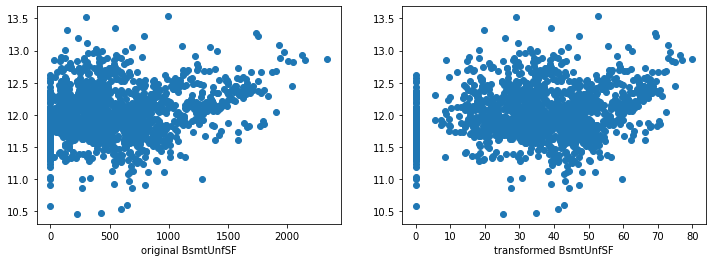

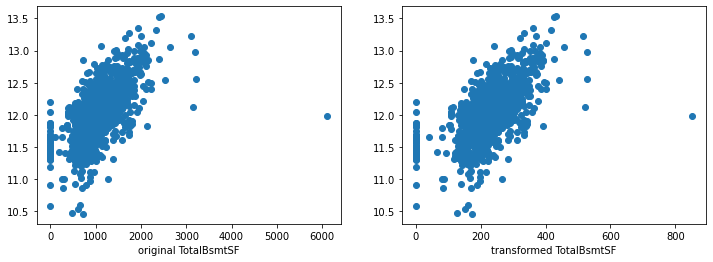

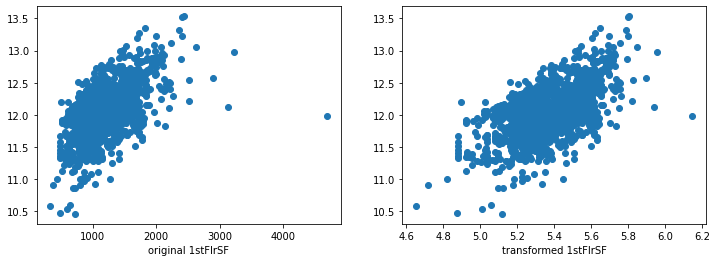

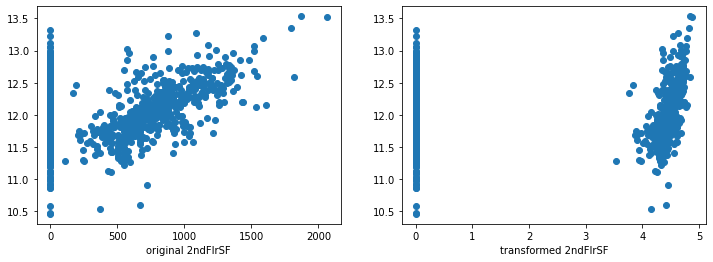

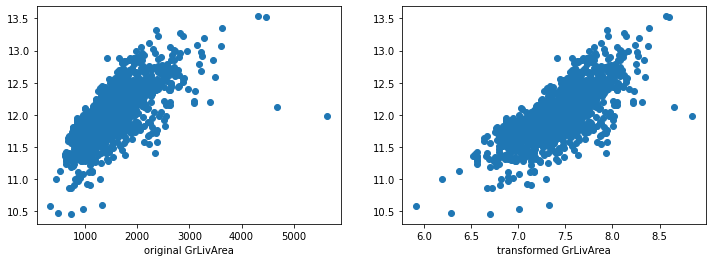

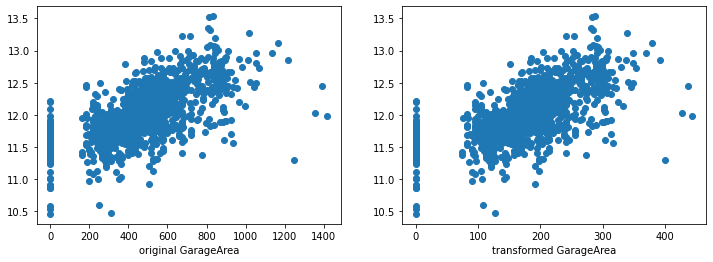

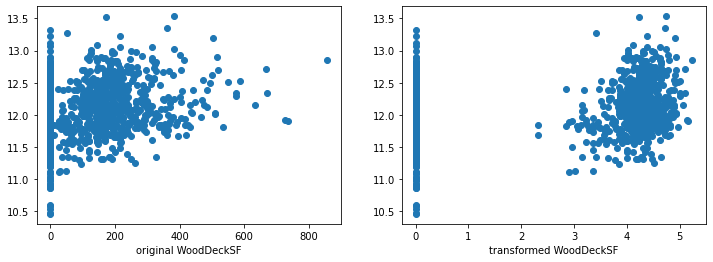

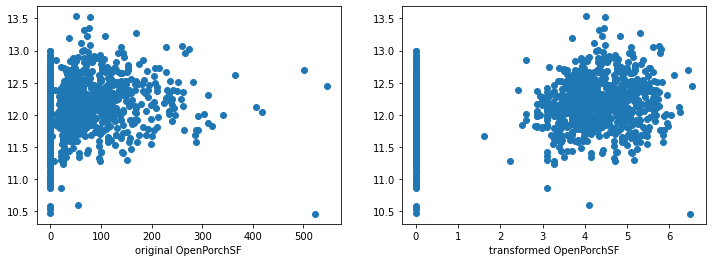

In [101]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship


for var in cont_var:
    plt.figure(figsize=(12,4))
    
    plt.subplot(1,2,1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.xlabel('original '+var)
    
    plt.subplot(1,2,2)
    plt.scatter(temp[var], np.log(df['SalePrice']))
    plt.xlabel('transformed '+var)
    
    plt.show()

By eye, the transformations seems to improve the relationship only for LotArea.

Let's try a different transformation now. Most variables contain the value 0, and thus we can't apply the logarithmic transformation, but we can certainly do that for the following variables:

 ["LotFrontage", "1stFlrSF", "GrLivArea"]
 
 So let's do that and see if that changes the variable distribution and its relationship with the target.
 

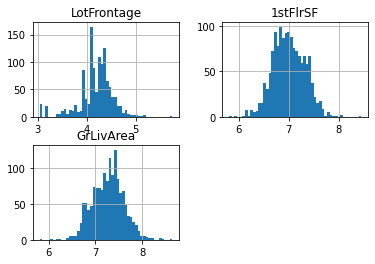

In [104]:
# Let's go ahead and analyse the distributions of these variables
# after applying a logarithmic transformation

temp = df.copy()
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    temp[var] = np.log(df[var])
temp[["LotFrontage", "1stFlrSF", "GrLivArea"]].hist(bins=50)
plt.show()

The distribution of the variables are now more "Gaussian" looking.

Let's go ahead and evaluate their relationship with the target.

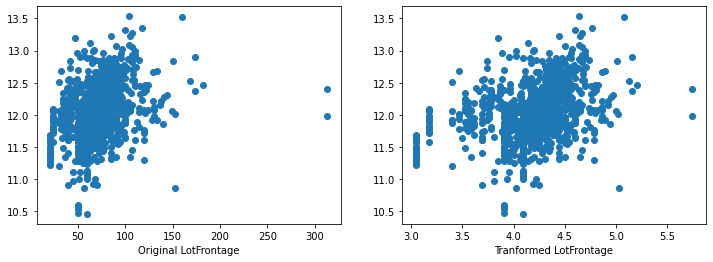

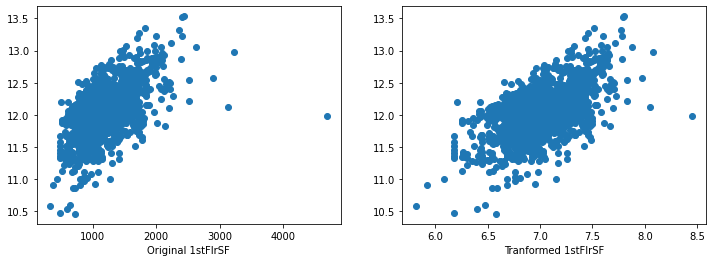

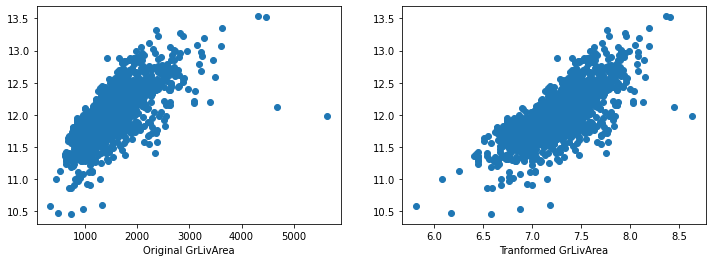

In [106]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.scatter(df[var], np.log(df['SalePrice']))
    plt.xlabel('Original '+var)
    
    plt.subplot(1,2,2)
    plt.scatter(temp[var], np.log(df['SalePrice']))
    plt.xlabel('Tranformed '+ var)
    
    plt.show()

The transformed variables have a better spread of the values, which may in turn, help make better predictions.

## Skewed variables
now tranform the skewed variable to binary variables and see how predictive they are

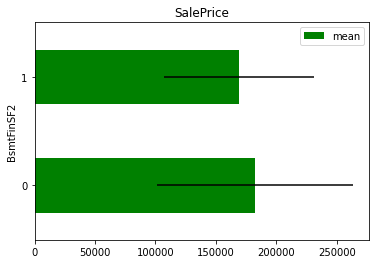

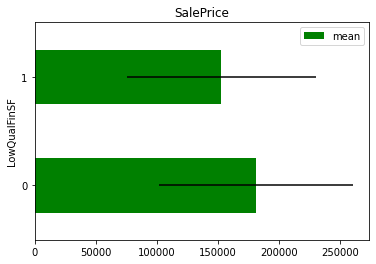

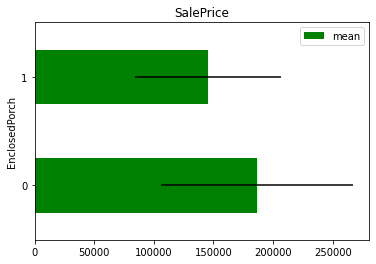

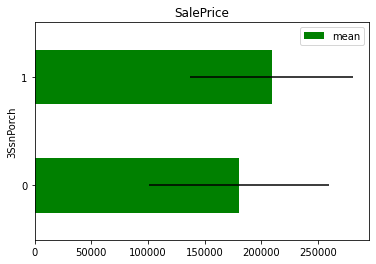

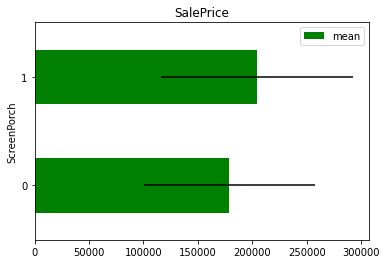

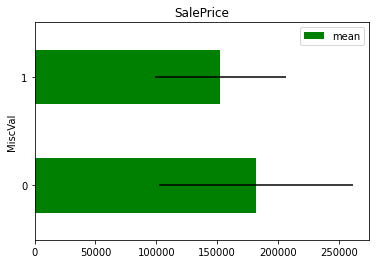

In [109]:
for var in skewed:
    temp = df.copy()
    temp[var] = np.where(df[var]==0, 0,1)
    temp = temp.groupby(var)['SalePrice'].agg(['mean', 'std'])
    temp.plot(kind ='barh',y = 'mean',legend= True,xerr = 'std',title='SalePrice',color='green')
    plt.show()

There seem to be a difference in Sale Price in the mapped values, but the confidence intervals overlap, so most likely this is not significant or predictive.

# Categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [111]:
print('Number of categorical variables: ', len(cat_var))

Number of categorical variables:  44


In [112]:
# let's visualise the values of the categorical variables
df[cat_var].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,20
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,70
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,60


## Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

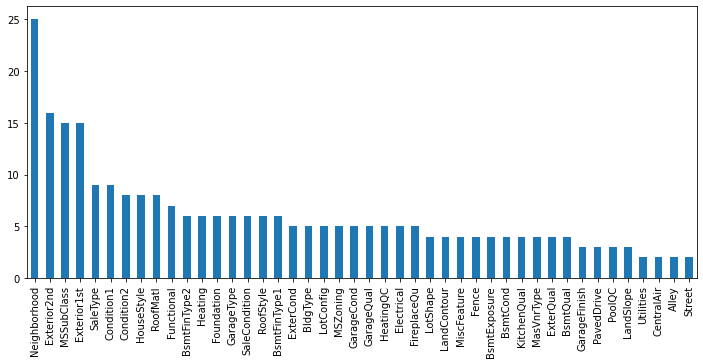

In [115]:
df[cat_var].nunique().sort_values(ascending= False).plot.bar(figsize=(12,5))
plt.show()

All the categorical variables show low cardinality, this means that they have only few different labels. That is good as we won't need to tackle cardinality during our feature engineering lecture.


## Quality variables

There are a number of variables that refer to the quality of some aspect of the house, for example the garage, or the fence, or the kitchen. I will replace these categories by numbers increasing with the quality of the place or room.

The mappings can be obtained from the Kaggle Website. One example:

- Ex = Excellent
- Gd = Good
- TA = Average/Typical
- Fa =	Fair
- Po = Poor

In [117]:
# re-map strings to numbers, which determine quality

qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    df[var] = df[var].map(qual_mappings)

In [118]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4, 'Missing': 0, 'NA': 0}

var = 'BsmtExposure'

df[var] = df[var].map(exposure_mappings)

In [119]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    df[var] = df[var].map(finish_mappings)

In [120]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

df[var] = df[var].map(garage_mappings)

In [121]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

df[var] = df[var].map(fence_mappings)

In [122]:
# capture all quality variables

qual_vars  = qual_vars + finish_vars + ['BsmtExposure','GarageFinish','Fence']

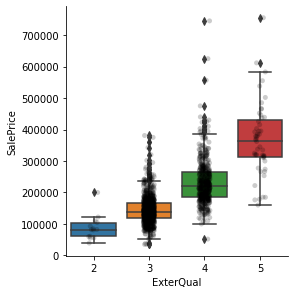

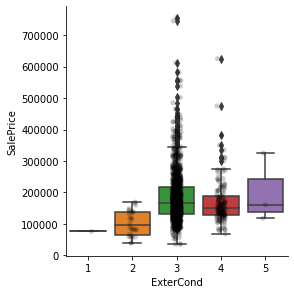

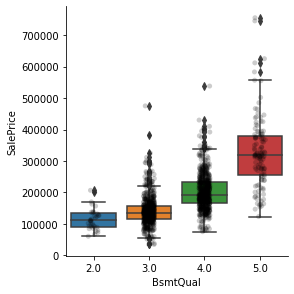

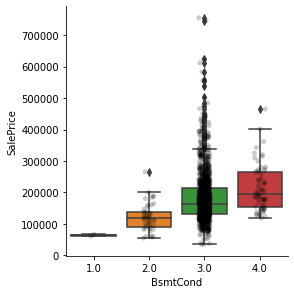

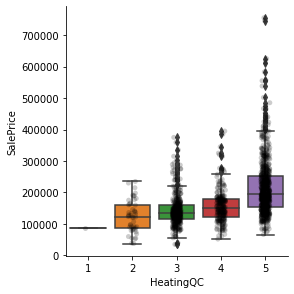

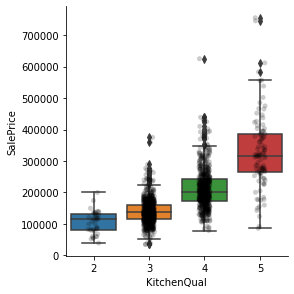

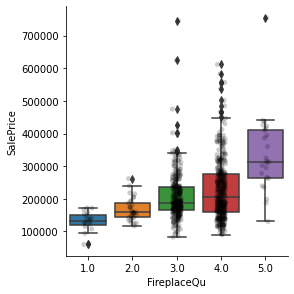

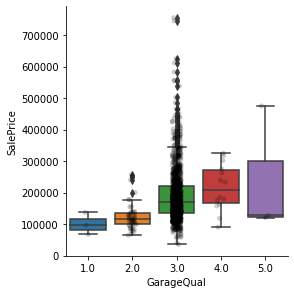

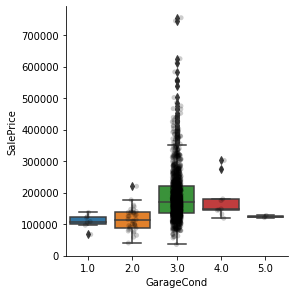

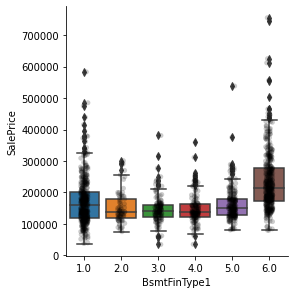

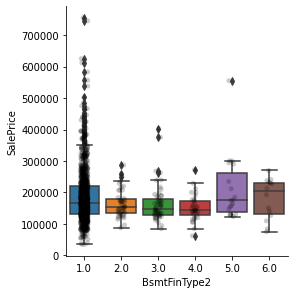

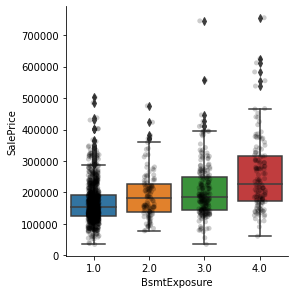

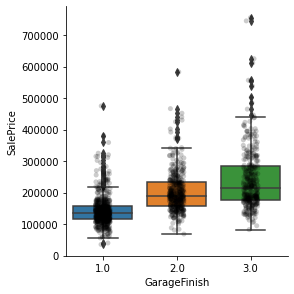

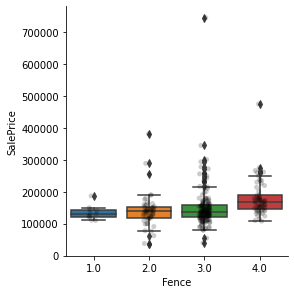

In [126]:
# now let's plot the house mean sale price based on the quality of the 
# various attributes

for var in qual_vars:
    sns.catplot(kind = 'box', x = var, y = 'SalePrice', data = df, height = 4)
    sns.stripplot(x = var, y = 'SalePrice', data= df,jitter = 0.1,alpha = 0.2, color ='k')
    plt.show()

for most variable the incrase in house price with value of variable is quite easily clear

In [128]:
# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_var if var not in qual_vars
]

len(cat_others)

30

## Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [130]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['SalePrice'].count() / len(df)

    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_others:
    print(analyse_rare_labels(df, var, 0.01))
    print()

MSZoning
C (all)    0.006849
Name: SalePrice, dtype: float64

Street
Grvl    0.00411
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

LotShape
IR3    0.006849
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

Utilities
NoSeWa    0.000685
Name: SalePrice, dtype: float64

LotConfig
FR3    0.00274
Name: SalePrice, dtype: float64

LandSlope
Sev    0.008904
Name: SalePrice, dtype: float64

Neighborhood
Blueste    0.001370
NPkVill    0.006164
Veenker    0.007534
Name: SalePrice, dtype: float64

Condition1
PosA    0.005479
RRAe    0.007534
RRNe    0.001370
RRNn    0.003425
Name: SalePrice, dtype: float64

Condition2
Artery    0.001370
Feedr     0.004110
PosA      0.000685
PosN      0.001370
RRAe      0.000685
RRAn      0.000685
RRNn      0.001370
Name: SalePrice, dtype: float64

Series([], Name: SalePrice, dtype: float64)

HouseStyle
1.5Unf    0.009589
2.5Fin    0.005479
2.5Unf    0.007534
Name: SalePrice, dtype: float64

RoofStyle
Flat

Some of the categorical variables show multiple labels that are present in less than 1% of the houses. 

Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models. 

That is why we want to remove them.

Finally, we want to explore the relationship between the categories of the different variables and the house sale price:

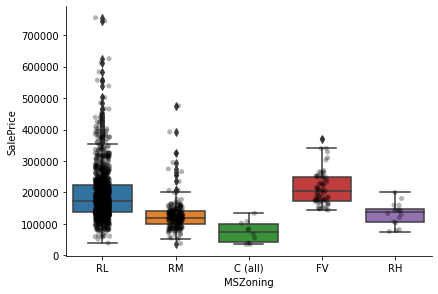

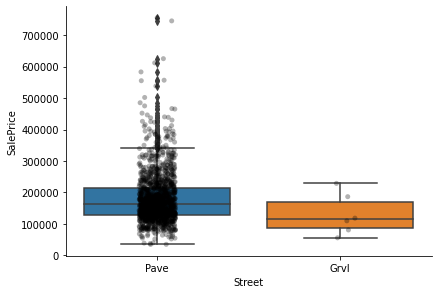

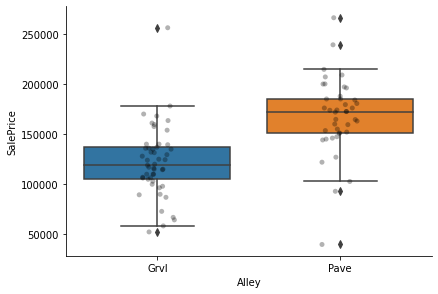

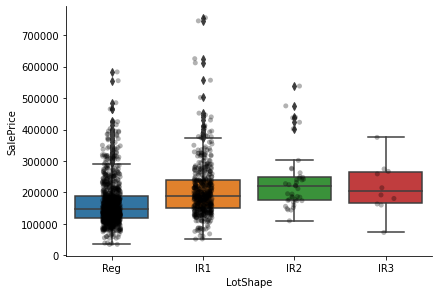

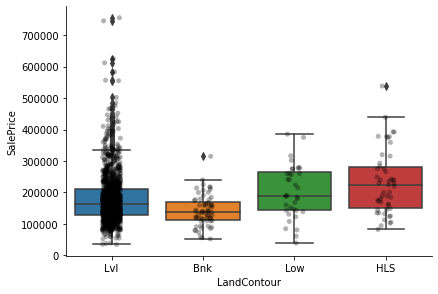

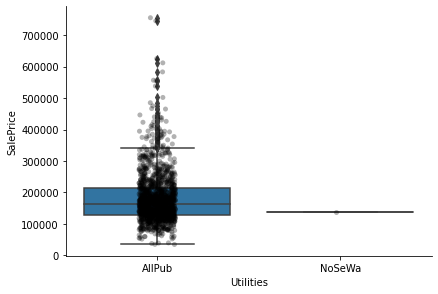

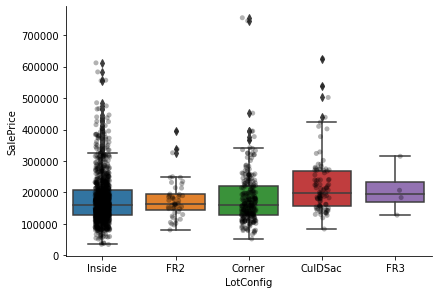

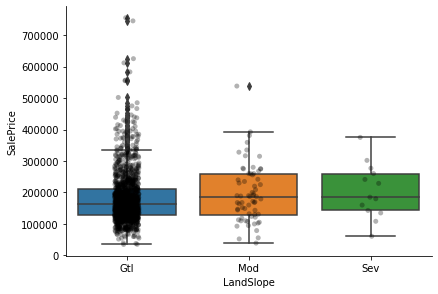

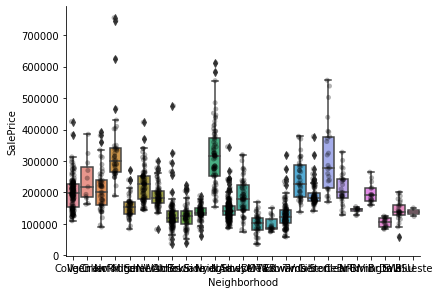

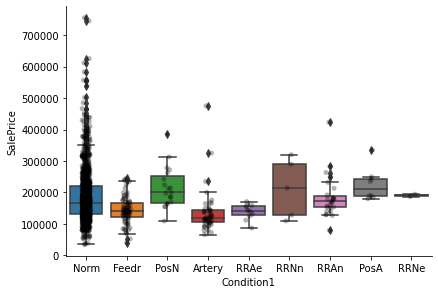

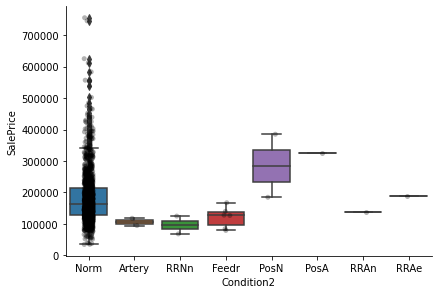

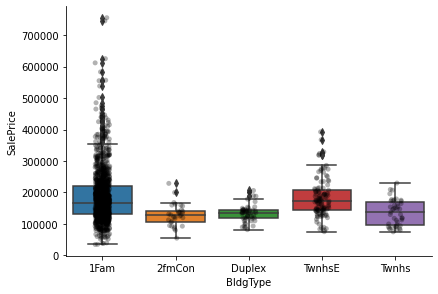

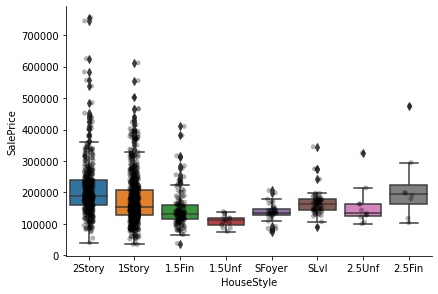

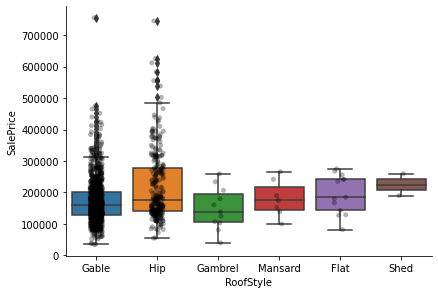

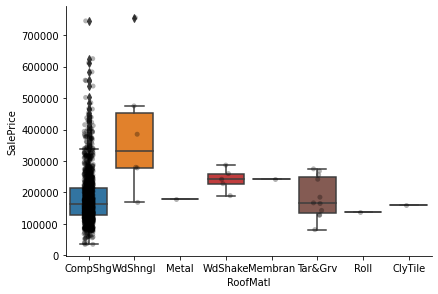

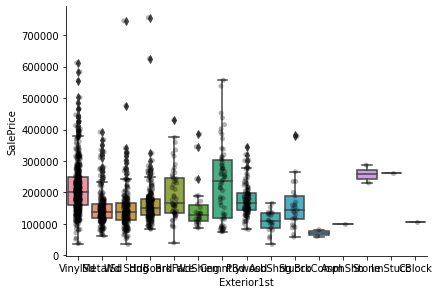

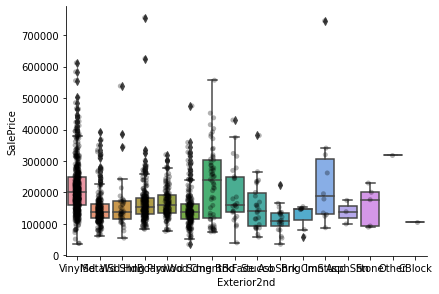

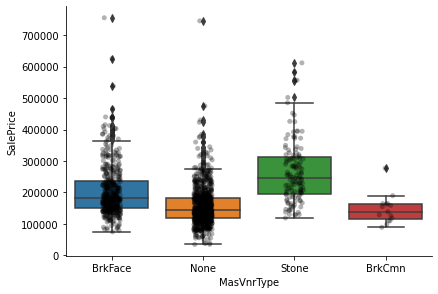

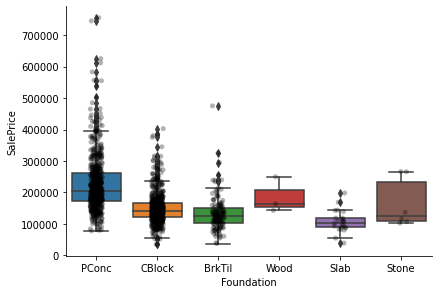

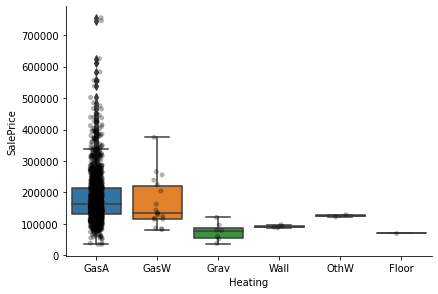

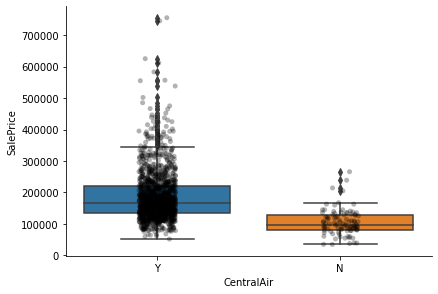

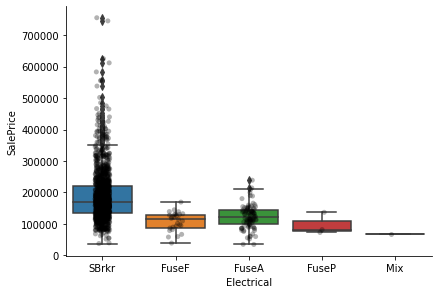

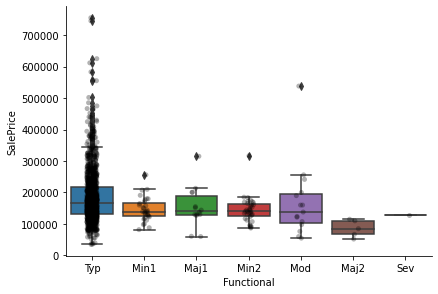

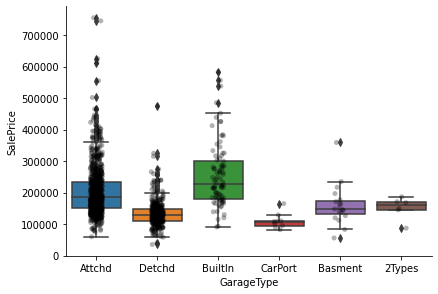

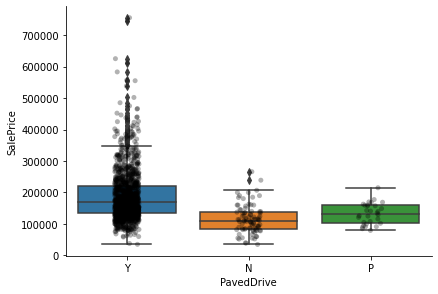

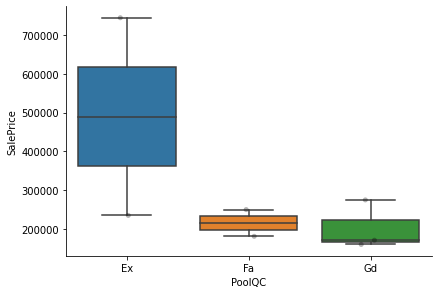

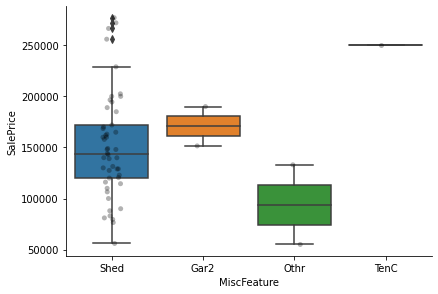

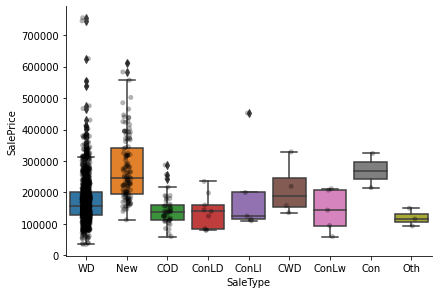

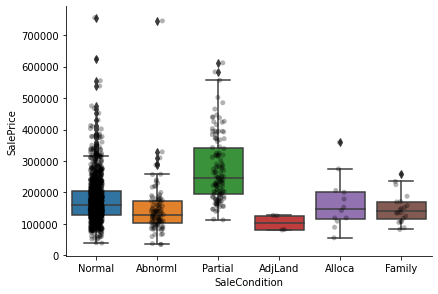

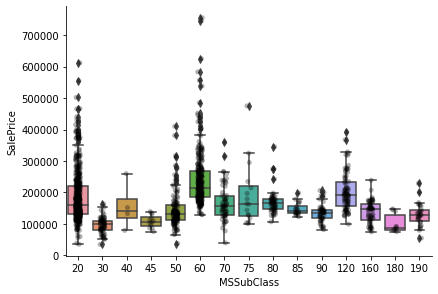

In [131]:
for var in cat_others:
    # make boxplot with Catplot
    sns.catplot(x=var, y='SalePrice', data=df, kind="box", height=4, aspect=1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x=var, y='SalePrice', data=df, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Clearly, the categories give information on the SalePrice, as different categories show different median sale prices.